<a href="https://colab.research.google.com/github/YumcoderCom/ml_dataton1/blob/main/Dataton_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please execute the provided code in Google Colab.

For the first run, ensure that you upload a CSV file named `dataton1_01.csv`.



# Import ML tools

In Python, you can import modules into your code using the **import** statement. Modules are Python files (with a .py extension) that contain **reusable** code, functions, classes, and variables.

- You can import a module with an **alias** (an alternate name) using the as keyword. This can make your code more concise or avoid naming conflicts. For example `import module_name as short_name`

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import os
from google.colab import files

# Upload dataset

To upload a dataset in Google Colab, you can use the built-in file upload feature.


In [ ]:
# Define the file path(name) and check if it exists
file_path = 'dataton1_01.csv'

if not os.path.exists(file_path):
    # File doesn't exist; upload it
    uploaded = files.upload()
    # Save the uploaded file
    for filename in uploaded.keys():
        # Rename the file to your desired name (if needed)
        os.rename(filename, file_path)
#
# Now you can proceed with your operations on the CSV file
#
# Load and preprocess the data
data = pd.read_csv(file_path)
data.head()

Saving CHL5230-F23-Datathon #1-Dataset1.csv to CHL5230-F23-Datathon #1-Dataset1.csv


,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


# Missing Values and Data

* Use the `.isna()` or `.isnull()` method to identify missing values in a DataFrame. This will return a DataFrame of Boolean values, where True indicates a missing value.

* `dtypes` is a property of a DataFrame that provides information about the data types of each column in the DataFrame.




In [ ]:
print(f'{"#" * 10} Missing values {"#" * 10}\n{data.isna().sum()}')
print(f'{"#" * 10} Data types of each column {"#" * 10}\n{data.dtypes}')

########## Missing values ##########
Age                    0
Gender                 0
Calorie_Intake         0
Sugar_Intake           0
Physical_Activity      0
Fast_Food_Frequency    0
Screen_Time            0
Height                 0
Weight                 0
BMI                    0
dtype: int64
########## Data types of each column ##########
Age                      int64
Gender                  object
Calorie_Intake           int64
Sugar_Intake             int64
Physical_Activity        int64
Fast_Food_Frequency      int64
Screen_Time              int64
Height                 float64
Weight                 float64
BMI                    float64
dtype: object


# Handling Categorical Data

**Categorical** data (*non-numeric*) needs to be encoded into numeric format for many machine learning algorithms. You can use methods like one-hot encoding (`.get_dummies()`) or label encoding (`.map()` or `LabelEncoder` from `scikit-learn`).

In [ ]:
# One-hot encode categorical features (e.g., 'Gender')
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)
data.head()

,Age,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,Gender_Male
0,56,3091,90,160,4,1,1.569070,81.199394,32.981343,0
1,69,2090,106,27,0,9,1.629449,74.273566,27.973877,0
2,46,2938,11,45,2,3,1.637726,71.453466,26.640417,1
3,32,3022,48,112,1,8,1.514198,98.163045,42.813720,0
4,60,2350,83,115,0,7,1.410559,57.323914,28.810685,0


Categorize BMI

In [ ]:
# Define BMI categories and thresholds
# You can customize these categories based on your desired BMI ranges
# categories = {
#     'Underweight': (0, 18.4),
#     'Normal Weight': (18.5, 24.9),
#     'Overweight': (25, 29.9),
#     'Obese': (30, 100)  # Adjust upper threshold as needed
# }

# Categorize BMI values
# def categorize_bmi(bmi):
#     for category, (lower, upper) in categories.items():
#         if lower <= bmi <= upper:
#             return category

# data['BMI_Category'] = data['BMI'].apply(categorize_bmi)
# Define your bins and label
BMI_labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']  # Define the bin edges
BMI_bins = [0, 18.5, 25.0, 30.0, float('inf')] # Labels for the bins
# Use pd.cut to create a new categorical column
data['BMI_Category'] = pd.cut(data['BMI'], bins=BMI_bins, labels=BMI_labels)

data.head()

,Age,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,Gender_Male,BMI_Category
0,56,3091,90,160,4,1,1.569070,81.199394,32.981343,0,Obese
1,69,2090,106,27,0,9,1.629449,74.273566,27.973877,0,Overweight
2,46,2938,11,45,2,3,1.637726,71.453466,26.640417,1,Overweight
3,32,3022,48,112,1,8,1.514198,98.163045,42.813720,0,Obese
4,60,2350,83,115,0,7,1.410559,57.323914,28.810685,0,Overweight


Data Exploration

In [ ]:
# Getting the shape of the dataframe
print(data.shape)

(23535, 11)


In [ ]:
# summary
print(data.describe())

                Age  Calorie_Intake  Sugar_Intake  Physical_Activity  \
count  23535.000000    23535.000000  23535.000000       23535.000000   
mean      48.532993     2495.845634     64.824559          89.496707   
std       17.872736      577.798752     32.004657          52.120810   
min       18.000000     1500.000000     10.000000           0.000000   
25%       33.000000     1991.000000     37.000000          45.000000   
50%       48.000000     2495.000000     65.000000          90.000000   
75%       64.000000     2994.000000     93.000000         135.000000   
max       79.000000     3499.000000    119.000000         179.000000   

       Fast_Food_Frequency   Screen_Time        Height        Weight  \
count         23535.000000  23535.000000  23535.000000  23535.000000   
mean              2.018441      5.486127      1.650279     70.019142   
std               1.414634      3.454036      0.119714     15.016866   
min               0.000000      0.000000      1.196086     10.0

Distribution of BMI

In [ ]:
bmi_cat_distribution = data['BMI_Category'].value_counts()
print(bmi_cat_distribution)

Normal Weight    7922
Overweight       6444
Obese            6256
Underweight      2913
Name: BMI_Category, dtype: int64


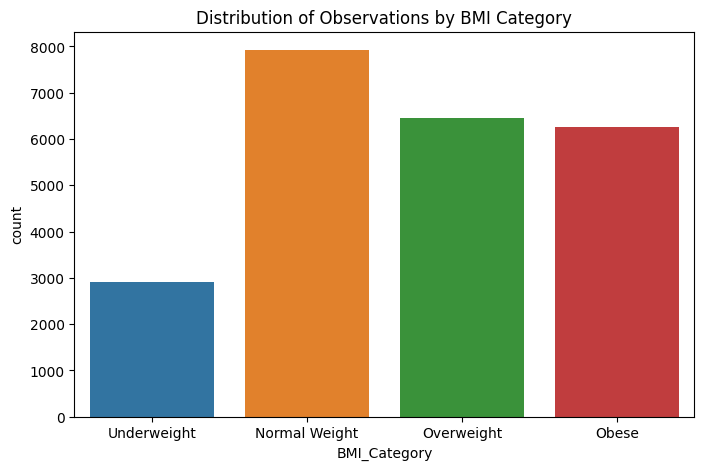

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##distribution of obs in BMI_Cat
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='BMI_Category')
plt.title("Distribution of Observations by BMI Category")
plt.show()

Summary of each feature by BMI Categories

In [ ]:
import plotly.express as px

feature_list = ['Age', 'Gender_Male', 'Calorie_Intake', 'Sugar_Intake','Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time']

#Age
fig = px.box(data, x='BMI_Category', y='Age', title='Age by BMI Category',
      color='BMI_Category', color_discrete_sequence=px.colors.qualitative.Set1)

fig.show()

Gender distribution by BMI category

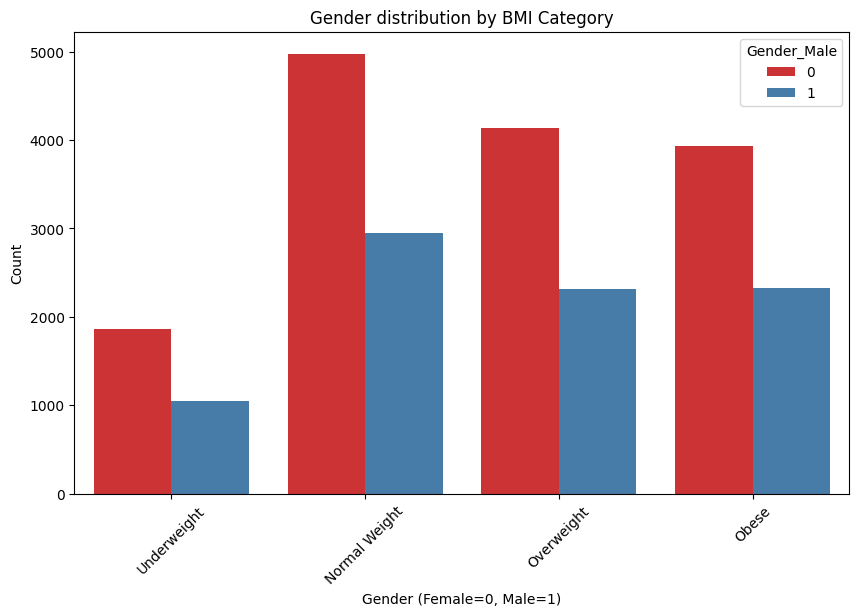

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Group the data by BMI and Gender and count the occurrences
count_data = data.groupby(['BMI_Category', 'Gender_Male']).size().reset_index(name='Count')

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='BMI_Category', y='Count', hue='Gender_Male', data=count_data, palette='Set1')

# Customize the chart
plt.title('Gender distribution by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
# plt.legend(title='Gender', labels=['Male', 'Female' ])
plt.xlabel('Gender (Female=0, Male=1)')
plt.xticks(rotation=45)

# Show the chart
plt.show()


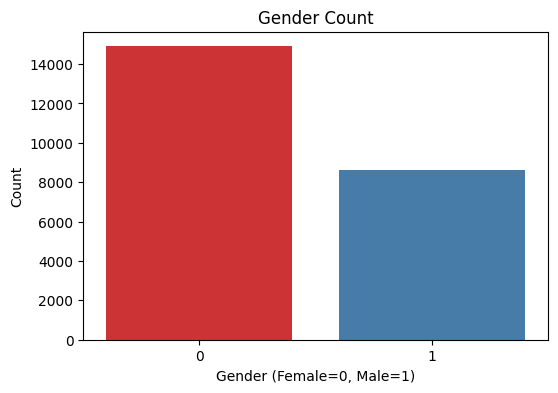

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count the occurrences of each gender
count_data = data['Gender_Male'].value_counts().reset_index()
count_data.columns = ['Gender_Male', 'Count']

# Create a bar chart using Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender_Male', y='Count', data=count_data, palette='Set1')

# Customize the chart
plt.title('Gender Count')
plt.xlabel('Gender (Female=0, Male=1)')
plt.ylabel('Count')

# Show the chart
plt.show()

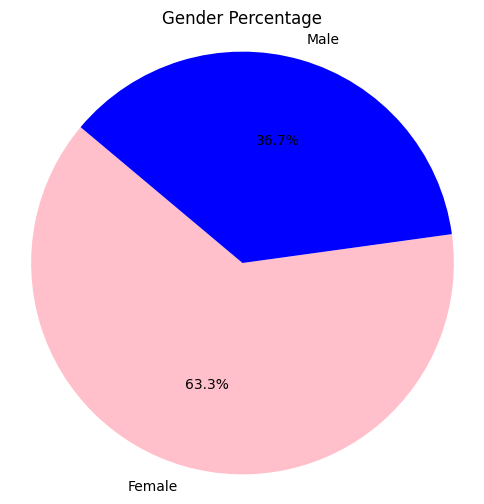

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the percentage of each gender
percentage_data = data['Gender_Male'].value_counts(normalize=True).reset_index()
percentage_data.columns = ['Gender_Male', 'Percentage']
percentage_data['Percentage'] *= 100  # Convert to percentage

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(percentage_data['Percentage'], labels=['Female','Male'], autopct='%1.1f%%', startangle=140, colors=['pink','blue'])

# Customize the chart
plt.title('Gender Percentage')

# Show the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
#Calorie Intake
fig = px.box(data, x='BMI_Category', y='Calorie_Intake', title='Calorie Intake by BMI Category',
      color='BMI_Category', color_discrete_sequence=px.colors.qualitative.Set1)

fig.show()

In [ ]:

#sugar intake
fig = px.box(data, x='BMI_Category', y='Sugar_Intake', title='Sugar Intake by BMI Category',
      color='BMI_Category', color_discrete_sequence=px.colors.qualitative.Set1)

fig.show()

In [ ]:
#physical activity
fig = px.box(data, x='BMI_Category', y='Physical_Activity', title='Physical Activity by BMI Category',
      color='BMI_Category', color_discrete_sequence=px.colors.qualitative.Set1)

fig.show()

In [ ]:
#fast food frequency
fig = px.box(data, x='BMI_Category', y='Fast_Food_Frequency', title='Fast Food Frequency by BMI Category',
      color='BMI_Category', color_discrete_sequence=px.colors.qualitative.Set1)

fig.show()

In [ ]:
#screen time
#physical activity
fig = px.box(data, x='BMI_Category', y='Screen_Time', title='Screen Time by BMI Category',
      color='BMI_Category', color_discrete_sequence=px.colors.qualitative.Set1)

fig.show()

# Feature selection

 Feature selection refers to the process of choosing a subset of the most relevant and informative features from your dataset while discarding irrelevant or redundant ones.

In [ ]:
# Extract features and target variable (BMI)
X = data[['Age', 'Gender_Male', 'Calorie_Intake', 'Sugar_Intake','Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time']]  # Features columns.
# X = data[['Calorie_Intake', 'Sugar_Intake','Fast_Food_Frequency']]  # Features columns.
y = data['BMI']        # The last column (target)
X

,Calorie_Intake,Sugar_Intake,Fast_Food_Frequency
0,3091,90,4
1,2090,106,0
2,2938,11,2
3,3022,48,1
4,2350,83,0
...,...,...,...
23530,2858,65,1
23531,2573,27,1
23532,2246,37,0
23533,1588,24,4


# Training and Testing Data Sets

* The training dataset is a portion of your data that you use to train and build your machine learning model.
* The testing dataset is a separate portion of your data that you use to evaluate the performance of your trained machine learning model.


In [ ]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=915) # random_state (here is 915) is a random seed for reproducibility

# Standardize the features

**Standardizing features** or **feature scaling**, is a preprocessing step in machine learning that transforms the features of your dataset to have a mean of 0 and a standard deviation of 1 (standard normal distribution).

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training a K-NN model

Create a K-NN regression model

*   The "Elbow Method" is a heuristic technique used to determine an optimal value for the K parameter in the K-Nearest Neighbors (K-NN) algorithm.



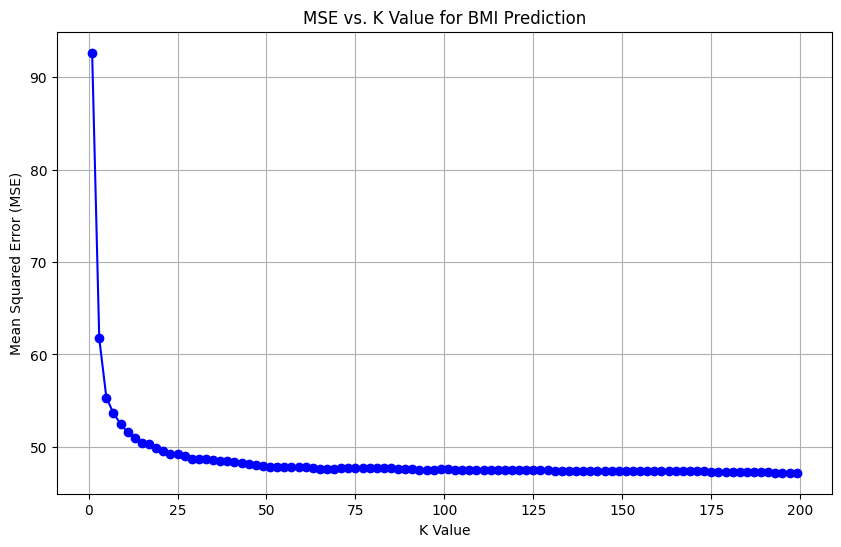

Best K: 199
Best MSE: 47.19457100079398


In [ ]:
import matplotlib.pyplot as plt

# Create a list of K values to test (e.g., from 1 to 20)
k_values = list(range(1, 200, 2))
mse_values = []
best_k = None
best_mse = float('inf')

# Iterate over different K values
for k in k_values:
    # Create a K-NN regression model
    knn = KNeighborsRegressor(n_neighbors=k) # metric='euclidean', 'manhattan', 'chebyshev', ...

    # Train the model on the training data
    knn.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = knn.predict(X_test)

    # Calculate the Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    # Check if this K value has a lower MSE than the current best
    if mse < best_mse:
        best_mse = mse
        best_k = k

# Plot the MSE values for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-', color='b')
plt.title('MSE vs. K Value for BMI Prediction')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

# Print the best K and corresponding MSE
print(f"Best K: {best_k}")
print(f"Best MSE: {best_mse}")

In [ ]:
k = 23
# metric='euclidean', 'manhattan', 'chebyshev', etc.
knn_regressor = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=23)

# Evaluate the model's performance

Predict the target values on the testing data and compute the `mean_squared_error`. BMI is typically calculated using a simple formula based on a person's height and weight. Since BMI is a continuous numeric value, when you're building a prediction model to estimate BMI, **you would typically expect a low MSE**. A high MSE suggests that the predictions made by the model are significantly different from the true BMI values, indicating a lack of accuracy in the model's predictions.

In [ ]:
y_pred = knn_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 49.23760974933484


# Regression chart

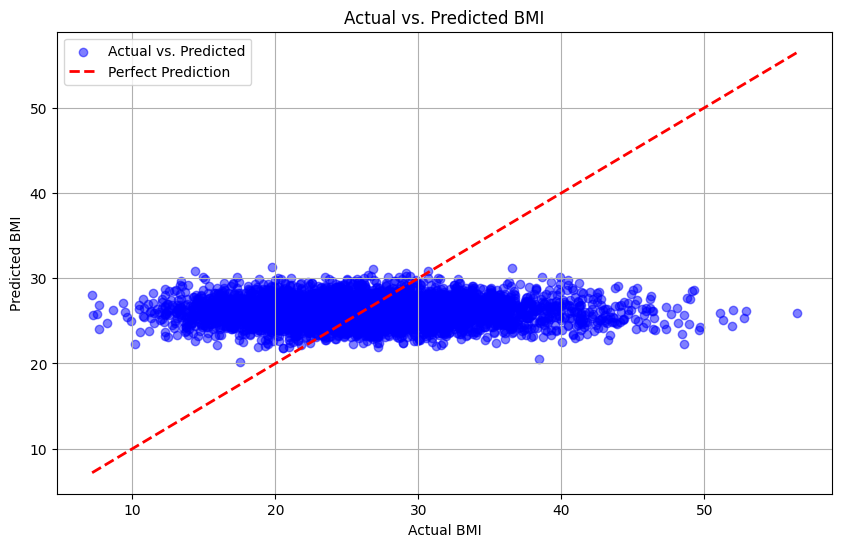

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b', label='Actual vs. Predicted')

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

plt.title('Actual vs. Predicted BMI')
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.legend()
plt.grid(True)
plt.show()


# K-NN classification model



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import os
from google.colab import files
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Define the file path(name) and check if it exists
file_path = 'dataton1_01.csv'

if not os.path.exists(file_path):
    # File doesn't exist; upload it
    uploaded = files.upload()
    # Save the uploaded file
    for filename in uploaded.keys():
        # Rename the file to your desired name (if needed)
        os.rename(filename, file_path)
#
# Now you can proceed with your operations on the CSV file
#
# Load and preprocess the data
data = pd.read_csv(file_path)
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)
data.head()

# Define BMI categories and thresholds
# You can customize these categories based on your desired BMI ranges
# categories = {
#     'Underweight': (0, 18.4),
#     'Normal Weight': (18.5, 24.9),
#     'Overweight': (25, 29.9),
#     'Obese': (30, 100)
# }

# Categorize BMI values
# def categorize_bmi(bmi):
#     for category, (lower, upper) in categories.items():
#         if lower <= bmi <= upper:
#             return category

# data['BMI_Category'] = data['BMI'].apply(categorize_bmi)
# Define your bins and label
BMI_labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']  # Define the bin edges
BMI_bins = [0, 18.5, 25.0, 30.0, float('inf')] # Labels for the bins
# Use pd.cut to create a new categorical column
data['BMI_Category'] = pd.cut(data['BMI'], bins=BMI_bins, labels=BMI_labels)

data.head()

# print(data['BMI_Category'].isna().sum())


,Age,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,Gender_Male,BMI_Category
0,56,3091,90,160,4,1,1.569070,81.199394,32.981343,0,Obese
1,69,2090,106,27,0,9,1.629449,74.273566,27.973877,0,Overweight
2,46,2938,11,45,2,3,1.637726,71.453466,26.640417,1,Overweight
3,32,3022,48,112,1,8,1.514198,98.163045,42.813720,0,Obese
4,60,2350,83,115,0,7,1.410559,57.323914,28.810685,0,Overweight


In [ ]:
# Select features and target
selected_features = ['Age', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time']
X = data[selected_features]
y = data['BMI_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=915)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a K-NN classification model
k = 23
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the model on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.29764181007010837
Classification Report:
               precision    recall  f1-score   support

Normal Weight       0.32      0.56      0.41      1540
        Obese       0.26      0.21      0.23      1262
   Overweight       0.29      0.21      0.24      1330
  Underweight       0.11      0.01      0.01       575

     accuracy                           0.30      4707
    macro avg       0.24      0.25      0.22      4707
 weighted avg       0.27      0.30      0.26      4707

Confusion Matrix:
[[856 349 321  14]
 [743 263 243  13]
 [759 286 278   7]
 [320 121 130   4]]


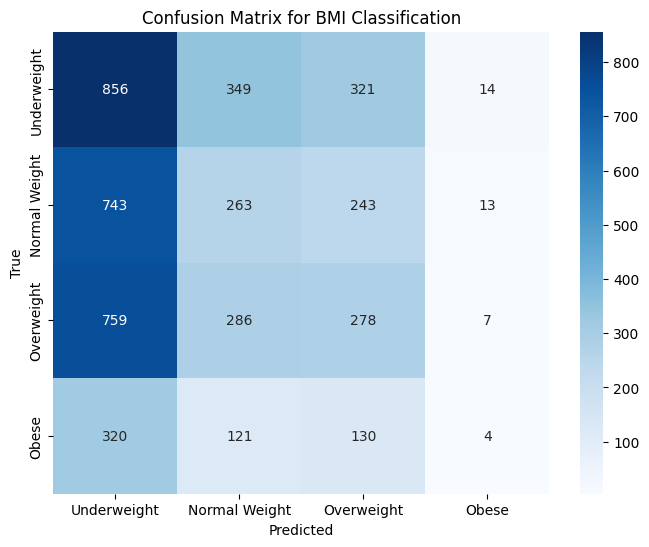

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=BMI_labels, yticklabels=BMI_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for BMI Classification')
plt.show()


A confusion matrix is a table that is used in machine learning and statistics to assess the performance of a classification model. It is a square table that has two rows and two columns, and it shows the number of correct and incorrect predictions made by the model.

The rows of the confusion matrix represent the actual classes of the data, and the columns represent the predicted classes. The diagonal elements of the confusion matrix represent the number of correct predictions, and the off-diagonal elements represent the number of incorrect predictions.

**Accuracy** is the percentage of correct predictions made by a classification model. It is calculated as follows:

`Accuracy = (True Positives + True Negatives) / (Total Predictions)`

**Precision** is the percentage of positive predictions that are correct. It is calculated as follows:

`Precision = True Positives / (True Positives + False Positives)`

**Recall** is the percentage of actual positive cases that are correctly predicted. It is calculated as follows:

`Recall = True Positives / (True Positives + False Negatives)`

**F1 score** is a harmonic mean of precision and recall. It is calculated as follows:

`F1 score = 2 * (Precision * Recall) / (Precision + Recall)`

*Accuracy* is **a good metric for evaluating the overall performance of a classification model**. However, **it can be misleading if the model is not balanced**, i.e. if there is a large difference in the number of positive and negative cases in the data.

*Precision and recall* are more informative metrics than accuracy, as they take into account the true positives, false positives, true negatives, and false negatives. *Precision* is important for applications where **it is critical to avoid false positives**, such as spam filtering. *Recall* is important for applications where **it is critical to avoid false negatives**, such as fraud detection.

`F1 score` is **a good metric for evaluating the performance of a classification model when both precision and recall are important**. It is a harmonic mean of precision and recall, which means that it gives equal weight to both metrics.

# Distributions of features for different BMI categories

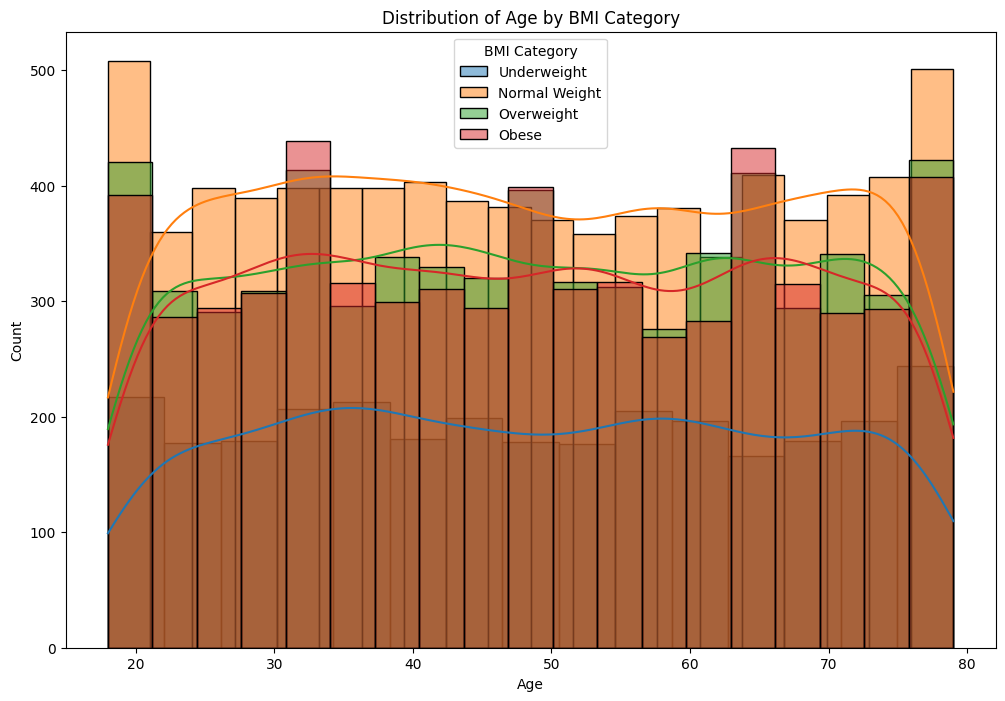

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a feature to visualize (e.g., 'Age')
feature_to_visualize = 'Age'

# Create subplots for each BMI category
plt.figure(figsize=(12, 8))

# Loop through each BMI category and create a histogram
for category in BMI_labels:
    subset = data[data['BMI_Category'] == category]
    sns.histplot(subset[feature_to_visualize], kde=True, label=category)

plt.title(f'Distribution of {feature_to_visualize} by BMI Category')
plt.xlabel(feature_to_visualize)
plt.legend(title='BMI Category')
plt.show()


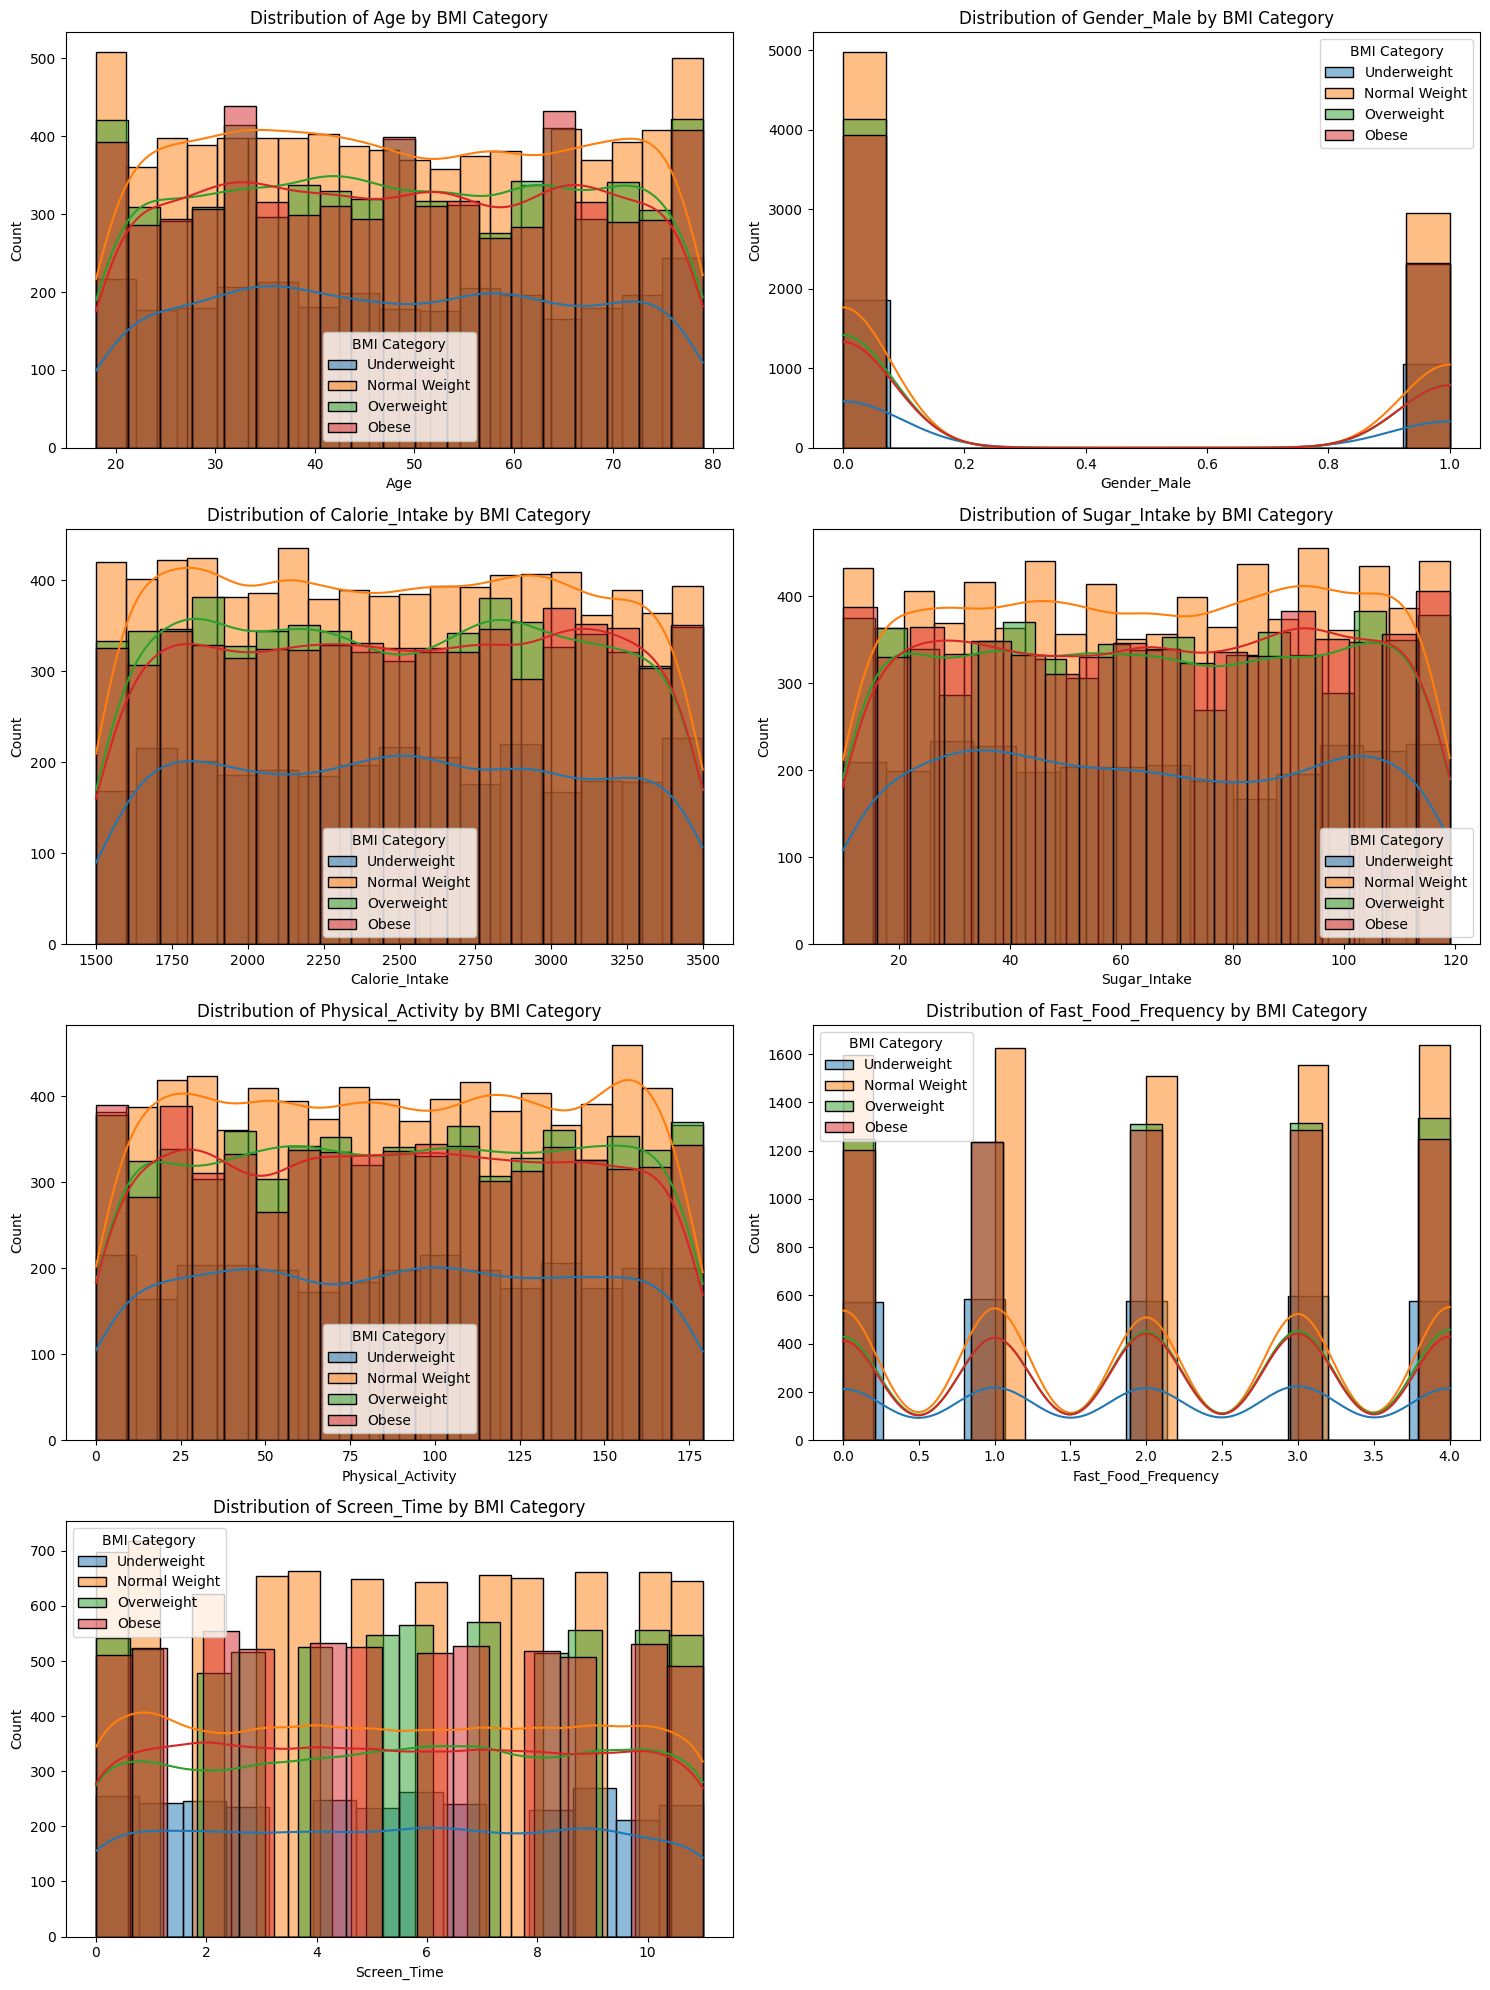

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_list = ['Age', 'Gender_Male', 'Calorie_Intake', 'Sugar_Intake','Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time']
# Create subplots for each feature
num_features = len(feature_list)
num_rows = (num_features + 1) // 2
num_cols = 2

plt.figure(figsize=(15, 5 * num_rows))

for i, feature_to_visualize in enumerate(feature_list):
    plt.subplot(num_rows, num_cols, i + 1)
    for category in BMI_labels:
        subset = data[data['BMI_Category'] == category]
        sns.histplot(subset[feature_to_visualize], kde=True, label=category)

    plt.title(f'Distribution of {feature_to_visualize} by BMI Category')
    plt.xlabel(feature_to_visualize)
    plt.legend(title='BMI Category')

plt.tight_layout()
plt.show()



In [ ]:
feature_name = 'Age'
ds = data[[feature_name, 'BMI_Category']]
# feature_list = ['Age', 'Gender_Male', 'Calorie_Intake', 'Sugar_Intake','Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time']
avg_by_category = ds.groupby('BMI_Category')[feature_name].mean().reset_index()
avg_by_category

,BMI_Category,Age
0,Underweight,48.668726
1,Normal Weight,48.424135
2,Overweight,48.624612
3,Obese,48.513267


Correlation Map

<ipython-input-6-f9148dc9dc46>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


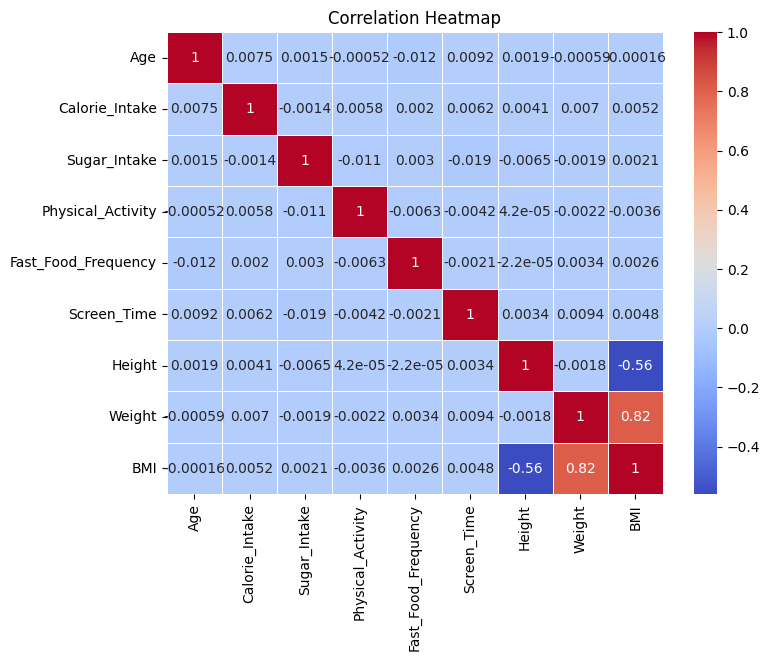

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()